<a href="https://colab.research.google.com/github/charu6969/charu6969/blob/main/cardataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install --upgrade scikit-learn

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib as pyplt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings("ignore")
from sklearn import preprocessing

In [ ]:
data = pd.read_csv('/content/CAR DETAILS FROM CAR DEKHO.csv')
data

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner


In [ ]:
data.shape

(4340, 8)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [ ]:
data.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [ ]:
data.isna().sum()

,0
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0


In [ ]:
data["year"]

,year
0,2007
1,2007
2,2012
3,2017
4,2014
...,...
4335,2014
4336,2014
4337,2009
4338,2016


In [ ]:
np.max(data["year"])

2020

In [ ]:
data.drop("year" , axis = 1 , inplace = True)
data

,name,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,865000,90000,Diesel,Individual,Manual,First Owner


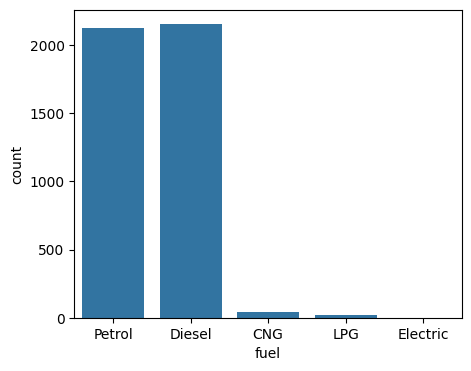

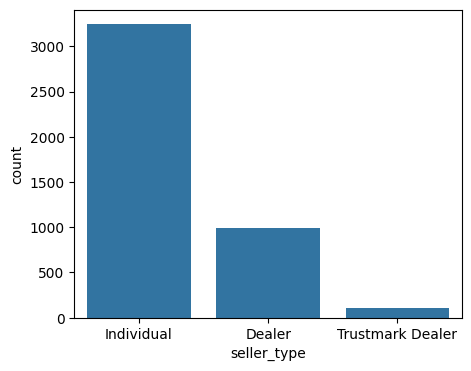

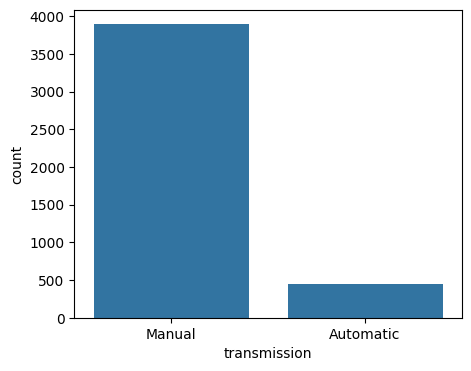

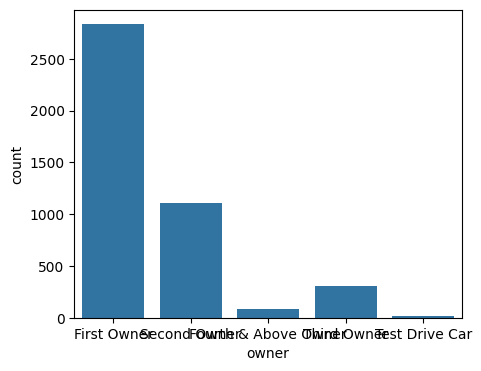

In [ ]:
  columns = ["fuel","seller_type","transmission","owner"]
for i in columns:
    fig = plt.figure(figsize =[5,4])
    sns.countplot(x=i, data=data)
    plt.xlabel(i)
    plt.show()

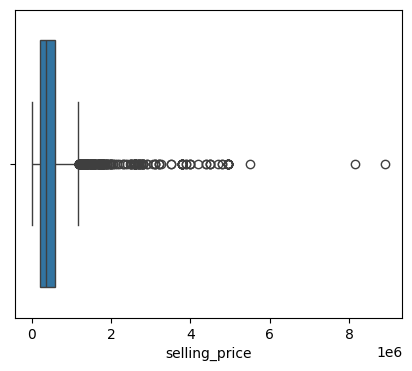

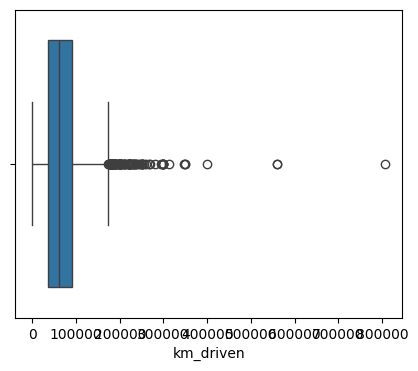

In [ ]:
columns = ["selling_price","km_driven"]
for i in columns:
    fig = plt.figure(figsize =[5,4])
    sns.boxplot(x=i, data=data)
    plt.xlabel(i)
    plt.show()

In [ ]:
numeric_data = data.select_dtypes(include=["number"])
numeric_data

,selling_price,km_driven
0,60000,70000
1,135000,50000
2,600000,100000
3,250000,46000
4,450000,141000
...,...,...
4335,409999,80000
4336,409999,80000
4337,110000,83000
4338,865000,90000


In [ ]:
numeric_data.corr()

,selling_price,km_driven
selling_price,1.000000,-0.192289
km_driven,-0.192289,1.000000


In [ ]:
print(pd.unique(data["fuel"]))
print(pd.unique(data["seller_type"]))
print(pd.unique(data["transmission"]))
print(pd.unique(data["owner"]))

['Petrol' 'Diesel' 'CNG' 'LPG' 'Electric']
['Individual' 'Dealer' 'Trustmark Dealer']
['Manual' 'Automatic']
['First Owner' 'Second Owner' 'Fourth & Above Owner' 'Third Owner'
 'Test Drive Car']


In [ ]:
data["fuel"].replace({"Petrol":2 , "Diesel":3 , "CNG":4} , inplace=True)
data["seller_type"].replace({"Dealer":2 , "Individual":3 } , inplace=True)
data["transmission"].replace({"Manual":2 , "Automatic":3 } , inplace=True)
data

,name,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,60000,70000,2,3,2,First Owner
1,Maruti Wagon R LXI Minor,135000,50000,2,3,2,First Owner
2,Hyundai Verna 1.6 SX,600000,100000,3,3,2,First Owner
3,Datsun RediGO T Option,250000,46000,2,3,2,First Owner
4,Honda Amaze VX i-DTEC,450000,141000,3,3,2,Second Owner
...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),409999,80000,3,3,2,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,409999,80000,3,3,2,Second Owner
4337,Maruti 800 AC BSIII,110000,83000,2,3,2,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,865000,90000,3,3,2,First Owner


In [ ]:
data.drop(labels="name" , axis =1 , inplace = True)
data

,selling_price,km_driven,fuel,seller_type,transmission,owner
0,60000,70000,2,3,2,First Owner
1,135000,50000,2,3,2,First Owner
2,600000,100000,3,3,2,First Owner
3,250000,46000,2,3,2,First Owner
4,450000,141000,3,3,2,Second Owner
...,...,...,...,...,...,...
4335,409999,80000,3,3,2,Second Owner
4336,409999,80000,3,3,2,Second Owner
4337,110000,83000,2,3,2,Second Owner
4338,865000,90000,3,3,2,First Owner


In [ ]:
x = data.drop ("selling_price" , axis =1)
y = data["selling_price"]

In [ ]:
x_train,x_test ,y_train, y_test = train_test_split(x ,y,test_size = 0.2, random_state =1)
print("x_train: ",x_train.shape)
print("x_test: ",x_test.shape)
print("y_test: ",y_test.shape)
print("y_train: ",y_train.shape)

x_train:  (3472, 5)
x_test:  (868, 5)
y_test:  (868,)
y_train:  (3472,)


In [ ]:
data["fuel"].replace({"Petrol":2 , "Diesel":3 , "CNG":4, "LPG": 1} , inplace=True) # Added LPG to the mapping
data["seller_type"].replace({"Dealer":2 , "Individual":3 } , inplace=True)
data["transmission"].replace({"Manual":2 , "Automatic":3 } , inplace=True)
data

,selling_price,km_driven,fuel,seller_type,transmission,owner
0,60000,70000,2,3,2,First Owner
1,135000,50000,2,3,2,First Owner
2,600000,100000,3,3,2,First Owner
3,250000,46000,2,3,2,First Owner
4,450000,141000,3,3,2,Second Owner
...,...,...,...,...,...,...
4335,409999,80000,3,3,2,Second Owner
4336,409999,80000,3,3,2,Second Owner
4337,110000,83000,2,3,2,Second Owner
4338,865000,90000,3,3,2,First Owner
